In [1]:
import pandas as pd

In [2]:
# df = pd.read_csv('C:/Users/stask/Analitics_Karpov/Module2/Homework/2_taxi_nyc.csv')
taxi = pd.read_csv('https://stepik.org/media/attachments/lesson/360340/2_taxi_nyc.csv')

In [3]:
# сколько всего строк и столбцов имеется в датасете.
rows, columns = taxi.shape
print(f'Rows: {rows}, Columns: {columns}')

Rows: 29101, Columns: 14


In [4]:
# Давайте посмотрим на типы колонок. Все ли из них считались правильно? 
# В качестве ответа выберите тип, преобладающий в датасете.
taxi.dtypes.value_counts(ascending=True)

int64      1
object     4
float64    9
dtype: int64

In [5]:
# В названиях столбцов pcp 01, pcp 06, pcp 24.
# Замените пробел в названиях на знак нижнего подчёркивания. 

taxi.columns

Index(['pickup_dt', 'pickup_month', 'borough', 'pickups', 'hday', 'spd', 'vsb',
       'temp', 'dewp', 'slp', 'pcp 01', 'pcp 06', 'pcp 24', 'sd'],
      dtype='object')

In [6]:
taxi = taxi.rename(columns={'pcp 01': 'pcp_01',\
                            'pcp 06': 'pcp_06',\
                            'pcp 24': 'pcp_24'})
taxi.columns

Index(['pickup_dt', 'pickup_month', 'borough', 'pickups', 'hday', 'spd', 'vsb',
       'temp', 'dewp', 'slp', 'pcp_01', 'pcp_06', 'pcp_24', 'sd'],
      dtype='object')

In [7]:
# А теперь вопрос: сколько раз в данных встречается район Бруклин (Brooklyn)?
taxi.query('borough == "Brooklyn"').shape[0]

4343

In [8]:
taxi.borough.value_counts()

Bronx            4343
Brooklyn         4343
EWR              4343
Manhattan        4343
Queens           4343
Staten Island    4343
Name: borough, dtype: int64

In [9]:
# выяснить, из какого района было совершено наибольшее количество поездок за весь период. 
# Для начала посчитайте общее количество поездок (pickups) без группировки.
taxi.pickups.sum()

14265773

In [10]:
taxi.groupby('borough', as_index=False) \
    .agg({'pickups': 'max'}) \
    .sort_values('pickups', ascending=False)


,borough,pickups
3,Manhattan,7883
1,Brooklyn,2009
4,Queens,831
0,Bronx,262
5,Staten Island,13
2,EWR,2


In [11]:
# сгруппируйте данные по району (borough)
# укажите, из какого пункта было совершено больше всего поездок
taxi.groupby('borough', as_index=False) \
    .agg({'pickups': 'sum'}) \
    .sort_values('pickups', ascending=False)

,borough,pickups
3,Manhattan,10367841
1,Brooklyn,2321035
4,Queens,1343528
0,Bronx,220047
5,Staten Island,6957
2,EWR,105


In [12]:
# Сохраните название района с наименьшим числом поездок 
# в переменную min_pickups, применив подходящий метод.
min_pickups = taxi.groupby('borough', as_index=False) \
    .agg({'pickups': 'sum'})
# min_pickups.idxmin()
type(min_pickups)

pandas.core.frame.DataFrame

In [13]:
min_pickups2 = taxi.groupby('borough').pickups.sum()
type(min_pickups2)

pandas.core.series.Series

In [14]:
min_pickups2.idxmin()

'EWR'

In [15]:
# Сгруппируйте данные по двум признакам: из какого района был сделан заказ 
# и является ли день выходным (колонки borough и hday). 
# Сравните среднее число поездок и выберите районы, из которых по праздникам 
# в среднем поступает больше заказов, чем в обычные дни.  

In [26]:
taxi.groupby(['borough', 'hday'], as_index=False). \
    aggregate({'pickups':'mean'}). \
    sort_values('pickups', ascending=False)

,borough,hday,pickups
6,Manhattan,N,2401.302921
7,Manhattan,Y,2035.928144
2,Brooklyn,N,534.727969
3,Brooklyn,Y,527.011976
9,Queens,Y,320.730539
8,Queens,N,308.899904
0,Bronx,N,50.771073
1,Bronx,Y,48.065868
10,Staten Island,N,1.606082
11,Staten Island,Y,1.497006


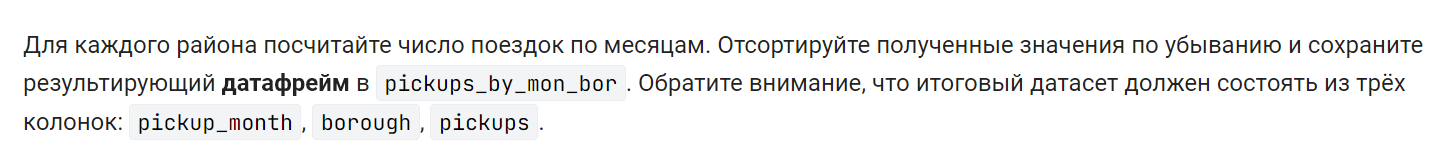

In [27]:
from datetime import datetime
datetime_obj = datetime.strptime('2015-01-01 01:00:00', '%Y-%m-%d %H:%M:%S')
formatted_month = datetime_obj.strftime("%B")

print(formatted_month)

January


In [28]:
taxi['month_name'] = taxi.pickup_dt.apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime("%B"))

In [29]:
taxi.groupby(['month_name', 'borough'], as_index=False). \
    agg({'pickups': 'sum'}). \
    sort_values('pickups', ascending=False).head(10)

,month_name,borough,pickups
21,June,Manhattan,1995388
33,May,Manhattan,1888800
9,February,Manhattan,1718571
27,March,Manhattan,1661261
3,April,Manhattan,1648278
15,January,Manhattan,1455543
19,June,Brooklyn,482466
31,May,Brooklyn,476087
1,April,Brooklyn,378095
25,March,Brooklyn,346726


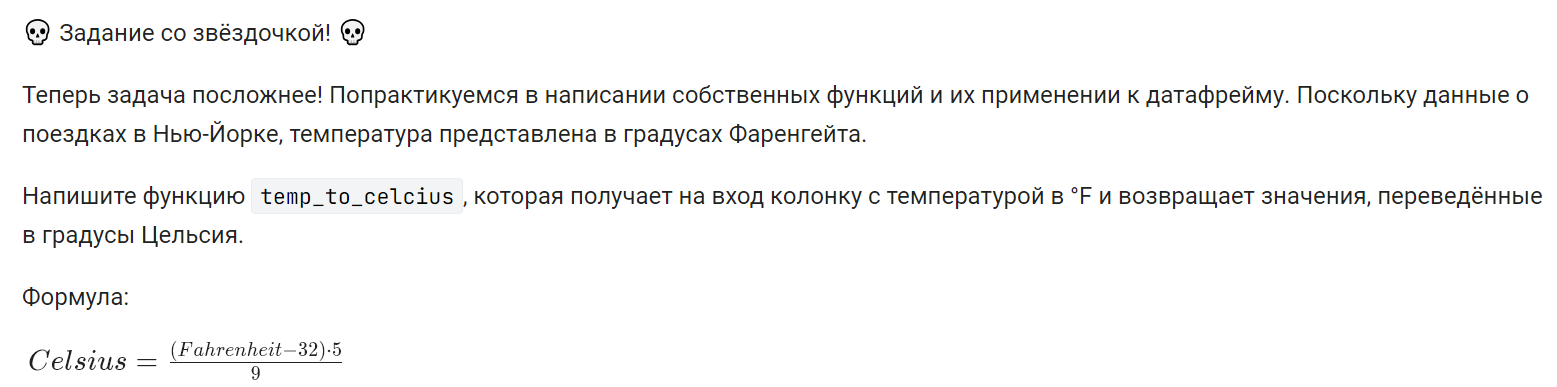

In [31]:
taxi['temp_f'] = taxi.temp.apply(lambda x: 1.8 * x + 32)

In [30]:
taxi.temp_f.describe()

count    29101.000000
mean       117.804276
std         35.666944
min         35.600000
25%         89.600000
50%        114.800000
75%        148.100000
max        192.200000
Name: temp_f, dtype: float64